# 1.EDA

In [254]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns


In [255]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [256]:
data = pd.read_csv('/content/drive/MyDrive/GCI/最終課題/dataset/I社/data.csv')

**EDAのまとめはPC勉強ファイルから**
file:///C:/Users/barun/Documents/%E5%8B%89%E5%BC%B7/eda.html

**欠損値無し**

In [257]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyAchievement          1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyAchievement         1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [258]:
#Attritionの数値化
data['Attrition'] = data['Attrition'].map({'No':0,'Yes':1})


In [259]:
data['OverTime'] = data['OverTime'].map({'No':0,'Yes':1})

In [260]:
print(data.shape)
data.head()

(1470, 38)


,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
0,25,0,Travel_Rarely,1280,Research & Development,7,1,Medical,1,143,...,2,2,3,2,2,2,1,intern,0,4
1,27,0,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,...,5,2,3,5,3,0,3,intern,0,1
2,25,1,Travel_Rarely,240,Sales,5,3,Marketing,1,142,...,6,1,3,6,4,0,3,agent_A,0,2
3,28,0,Travel_Rarely,440,Research & Development,21,3,Medical,1,221,...,5,2,1,5,2,0,2,New_graduate_recruitment,0,5
4,28,1,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,...,5,5,1,0,0,0,0,New_graduate_recruitment,0,1


In [261]:
correlation = data.corr(numeric_only=True) # Add numeric_only=True
attrition_corr = correlation['Attrition'].sort_values(ascending=False)
print(attrition_corr)

# 相関が高い変数を確認
high_corr_features = attrition_corr[(attrition_corr > 0.5) | (attrition_corr < -0.5)]
print("Attritionと高い相関を持つ特徴量:")
print(high_corr_features)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyAchievement          0.015170
HourlyAchievement          -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyAchievement           -0.056652
PerformanceRating          -0.056743
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
Incentive                  -0.110798
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
RemoteWork                 -0.142085
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
T

In [262]:
# 新しい特徴量を作成
data['EntryAge'] = data['Age'] - data['YearsAtCompany']  # 入社年齢
data['PreviousExperience'] = data['TotalWorkingYears'] - data['YearsAtCompany']  # 他社勤務経験

# 新しい特徴量を確認
print(data[['EntryAge', 'PreviousExperience']].describe())

          EntryAge  PreviousExperience
count  1470.000000         1470.000000
mean     29.915646            4.271429
std       9.281306            6.179783
min      18.000000            0.000000
25%      22.000000            0.000000
50%      28.000000            2.000000
75%      36.000000            5.000000
max      59.000000           33.000000


                    Attrition  EntryAge  PreviousExperience
Attrition            1.000000 -0.067990           -0.082147
EntryAge            -0.067990  1.000000            0.671765
PreviousExperience  -0.082147  0.671765            1.000000


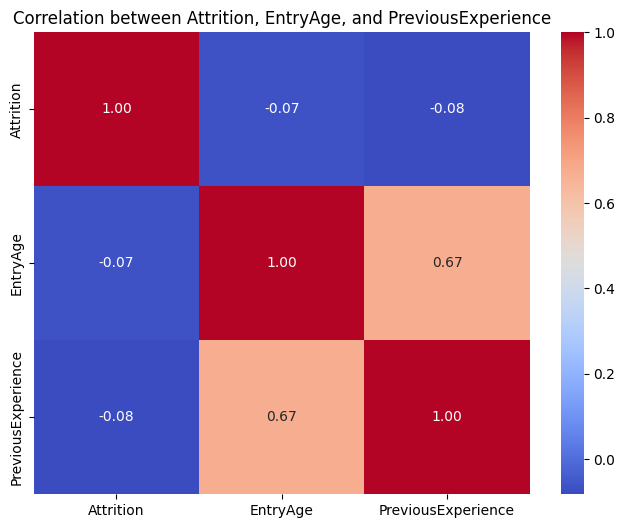

In [263]:
# prompt: 'EntryAge', 'PreviousExperience'と'Attrition'の相関関係を表示したい

# 相関関係の算出と表示
correlation_new = data[['Attrition', 'EntryAge', 'PreviousExperience']].corr()
print(correlation_new)

# ヒートマップで可視化
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Attrition, EntryAge, and PreviousExperience')
plt.show()

### 単一カラム(数値系)ヒストグラム

In [264]:
data.select_dtypes(exclude=object)

,Age,Attrition,DailyAchievement,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyAchievement,JobInvolvement,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Incentive,RemoteWork,EntryAge,PreviousExperience
0,25,0,1280,7,1,1,143,4,64,2,...,2,3,2,2,2,1,0,4,23,0
1,27,0,1167,4,2,1,1259,1,76,3,...,2,3,5,3,0,3,0,1,22,0
2,25,1,240,5,3,1,142,3,46,2,...,1,3,6,4,0,3,0,2,19,0
3,28,0,440,21,3,1,221,3,42,3,...,2,1,5,2,0,2,0,5,23,0
4,28,1,529,2,4,1,364,1,79,3,...,5,1,0,0,0,0,0,1,28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,39,0,1089,6,3,1,1525,2,32,3,...,3,3,2,0,2,2,774,3,37,7
1466,32,0,1146,15,4,1,1955,3,34,3,...,6,3,5,1,1,2,3333,5,27,4
1467,35,0,853,18,5,1,74,2,71,3,...,3,2,9,8,1,8,1962,3,26,0
1468,28,0,995,9,3,1,930,3,77,3,...,2,3,2,2,2,2,1188,3,26,4


In [265]:
int_cols = data.select_dtypes(exclude="object").columns

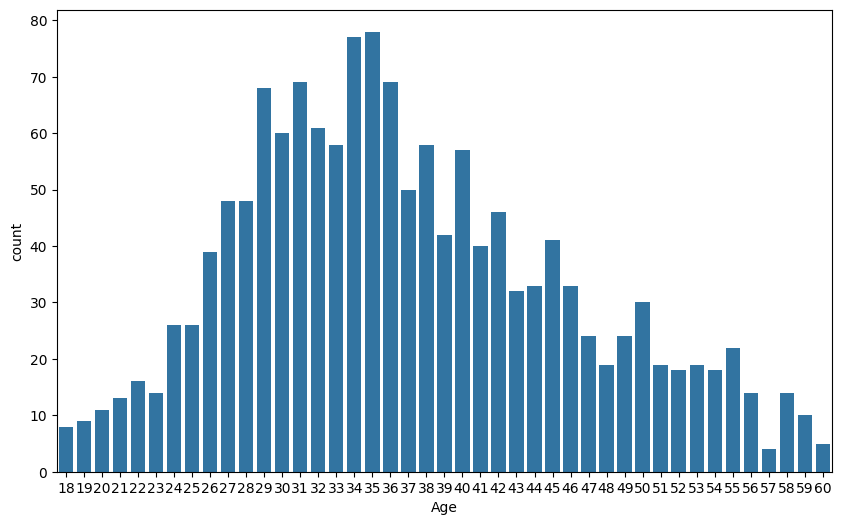

In [266]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=int_cols[0])
plt.show()

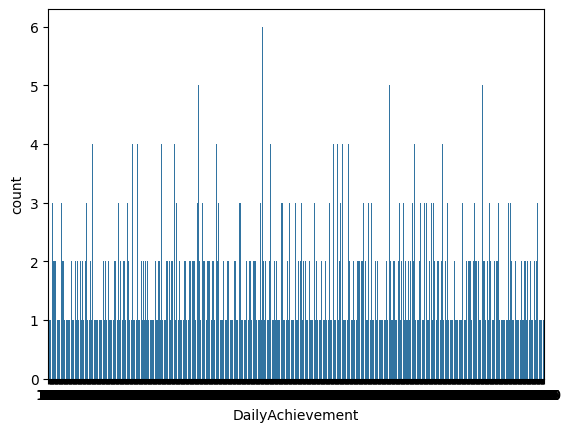

In [267]:
sns.countplot(data=data, x="DailyAchievement")
plt.show()

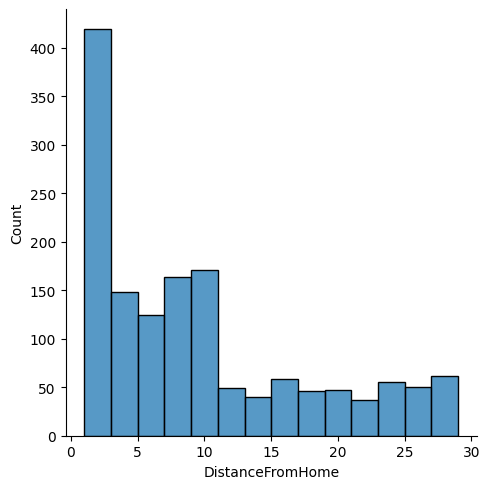

In [268]:
sns.displot(data=data, x='DistanceFromHome')
plt.show()

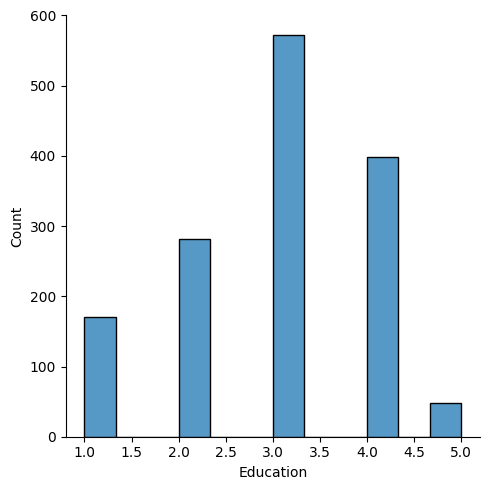

In [269]:
sns.displot(data=data, x='Education')
plt.show()

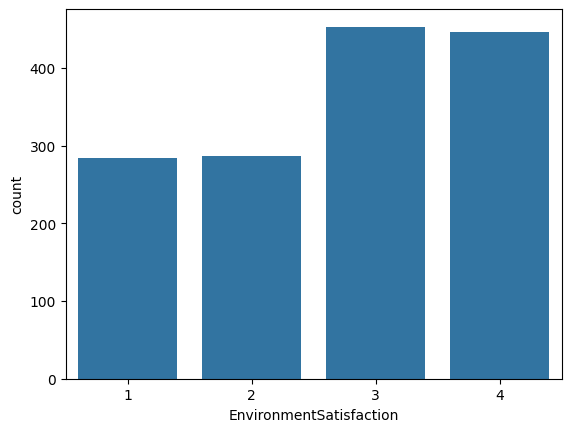

In [270]:
sns.countplot(data=data, x="EnvironmentSatisfaction")
plt.show()

### 相関関係

In [271]:
data2 = data.select_dtypes(exclude=object)

In [272]:
corr=data2.corr()
corr['Attrition'].sort_values(ascending=False).head(30)

,Attrition
Attrition,1.000000
OverTime,0.246118
DistanceFromHome,0.077924
NumCompaniesWorked,0.043494
MonthlyAchievement,0.015170
HourlyAchievement,-0.006846
EmployeeNumber,-0.010577
PercentSalaryHike,-0.013478
Education,-0.031373
YearsSinceLastPromotion,-0.033019


In [273]:
# prompt: 職務満足度とほかのカラムとの関係を数値で示す

# JobSatisfactionと他の数値型カラムとの相関を計算
numerical_cols = data.select_dtypes(include=np.number).columns
correlation_with_jobsatisfaction = data[numerical_cols].corr()['JobSatisfaction'].drop('JobSatisfaction')

print("JobSatisfactionとの相関:")
print(correlation_with_jobsatisfaction.sort_values(ascending=False))

JobSatisfactionとの相関:
RemoteWork                  0.490466
Incentive                   0.039127
DailyAchievement            0.030571
OverTime                    0.024539
PercentSalaryHike           0.020002
PerformanceRating           0.016063
StockOptionLevel            0.010690
MonthlyAchievement          0.000644
JobLevel                   -0.001944
YearsInCurrentRole         -0.002305
EntryAge                   -0.002305
DistanceFromHome           -0.003669
YearsAtCompany             -0.003803
Age                        -0.004892
TrainingTimesLastYear      -0.005779
EnvironmentSatisfaction    -0.006784
MonthlyIncome              -0.007157
Education                  -0.011296
RelationshipSatisfaction   -0.012454
YearsSinceLastPromotion    -0.018214
WorkLifeBalance            -0.019459
TotalWorkingYears          -0.020185
JobInvolvement             -0.021476
PreviousExperience         -0.021645
YearsWithCurrManager       -0.027656
EmployeeNumber             -0.046247
NumCompaniesWorke

### 単一カラム(カテゴリ系)分布可視化

In [274]:
data.select_dtypes(include=object)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,HowToEmploy
0,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Married,Y,intern
1,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Divorced,Y,intern
2,Travel_Rarely,Sales,Marketing,Male,Sales Executive,Single,Y,agent_A
3,Travel_Rarely,Research & Development,Medical,Male,Research Scientist,Married,Y,New_graduate_recruitment
4,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single,Y,New_graduate_recruitment
...,...,...,...,...,...,...,...,...
1465,Travel_Rarely,Research & Development,Life Sciences,Female,Manufacturing Director,Single,Y,New_graduate_recruitment
1466,Non-Travel,Research & Development,Medical,Female,Healthcare Representative,Divorced,Y,New_graduate_recruitment
1467,Travel_Frequently,Sales,Life Sciences,Male,Sales Executive,Married,Y,agent_A
1468,Travel_Rarely,Research & Development,Medical,Female,Research Scientist,Divorced,Y,intern


In [275]:
obj_cols = data.select_dtypes(include="object").columns

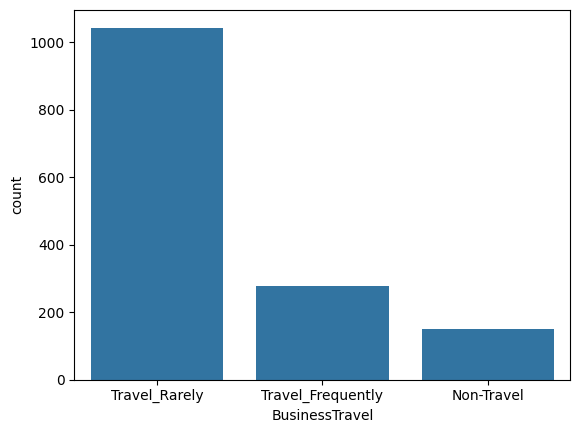

In [276]:
sns.countplot(data=data, x=obj_cols[0])
plt.show()

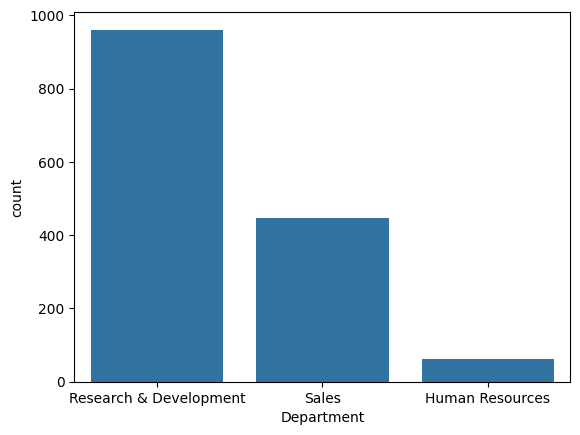

In [277]:
sns.countplot(data=data, x=obj_cols[1])
plt.show()

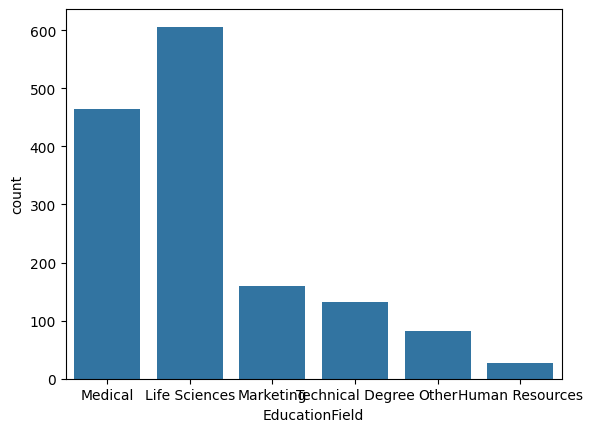

In [278]:
sns.countplot(data=data, x=obj_cols[2])
plt.show()

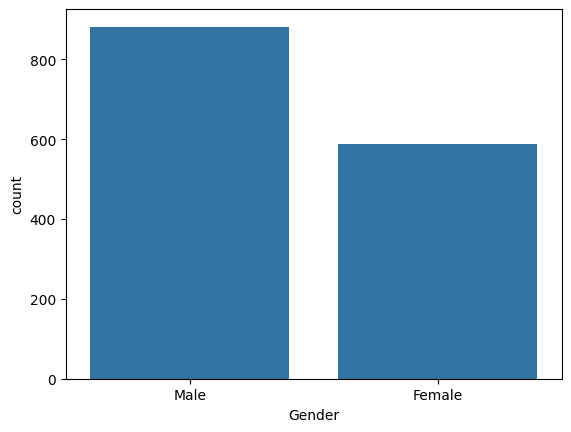

In [279]:
sns.countplot(data=data, x=obj_cols[3])
plt.show()

# 2.市場分析

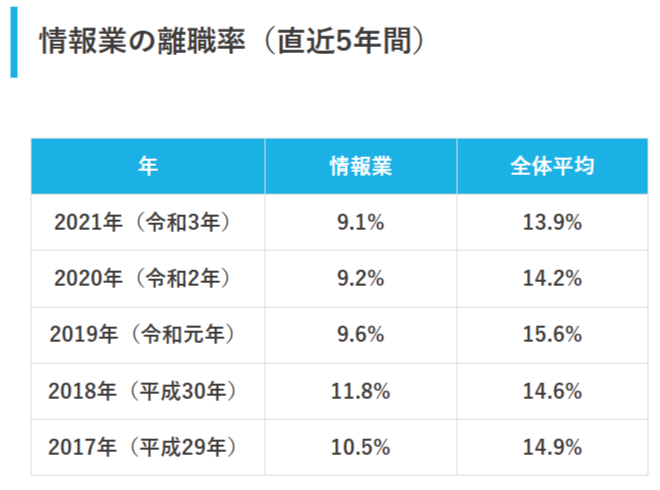

離職率の高さが課題だとわかる

論文
企業の人的資源に関する施策立案のためのシステム・ダイナミックスを用いたボトムアップアプローチモデリング
https://www.jstage.jst.go.jp/article/sdjapan/17/0/17_17/_article/-char/ja

# 3.モデル学習

In [280]:
# prompt: Attrtionカラムを表示

print(data['OverTime'])

0       0
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    1
Name: OverTime, Length: 1470, dtype: int64


In [281]:
# prompt: # カテゴリ変数のエンコーディング
# ターゲット変数（離職）を予測するために、データを**特徴量（X）とターゲット（y）**に分けます。
# 訓練データとテストデータに分割（例: 80%訓練、20%テスト）
# 数値データのスケーリング（例: StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データの読み込み（例）
# df = pd.read_csv('your_data.csv')  # 実際のファイル名に置き換えてください

# 特徴量（X）とターゲット（y）に分割
X = data.drop('Attrition', axis=1)  # '離職'カラムをターゲット変数として削除
y = data['Attrition']

# カテゴリ変数のエンコーディング（例：One-Hot Encoding）
X = pd.get_dummies(X, drop_first=True)  # ダミー変数化（最初のレベルを除外）


# データの分割（訓練データとテストデータ）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_stateで再現性を確保

# 数値データのスケーリング（StandardScaler）
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # 以下にモデル学習のコードを追加
# # ...


特徴量の重要度を評価しやすいランダムフォレストを使用

In [282]:
# prompt: # ランダムフォレストモデルを構築
# # モデル評価

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ランダムフォレストモデルのインスタンス化
rf_model = RandomForestClassifier(random_state=42)  # random_stateで再現性を確保

# モデルの訓練
rf_model.fit(X_train, y_train)

# テストデータでの予測
y_pred = rf_model.predict(X_test)

# モデルの評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

# 混同行列
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 特徴量の重要度
feature_importances = rf_model.feature_importances_

# 重要度の高い特徴量を上位10個表示
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))

Accuracy: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       256
           1       0.60      0.08      0.14        38

    accuracy                           0.87       294
   macro avg       0.74      0.54      0.54       294
weighted avg       0.84      0.87      0.83       294

Confusion Matrix:
[[254   2]
 [ 35   3]]

Top 10 Important Features:
               Feature  Importance
11       MonthlyIncome    0.066634
0                  Age    0.053504
20   TotalWorkingYears    0.042870
14            OverTime    0.041479
1     DailyAchievement    0.040113
27           Incentive    0.039230
5       EmployeeNumber    0.038738
12  MonthlyAchievement    0.038396
7    HourlyAchievement    0.038022
29            EntryAge    0.036555


XGBoostを用いたモデル構築

In [283]:
!pip install xgboost

In [284]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# データをDMatrix形式に変換（XGBoost専用形式）
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoostモデルのパラメータ設定
params = {
    'objective': 'binary:logistic',  # 2値分類
    'eval_metric': 'logloss',       # 評価指標（logloss）
    'eta': 0.1,                     # 学習率
    'max_depth': 5,                 # 決定木の深さ
    'subsample': 0.8,               # サブサンプリング
    'colsample_bytree': 0.8         # 特徴量のサブサンプリング
}

# モデルの訓練
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,             # ブースト回数
    evals=[(dtest, "test")],         # テストデータでの評価
    early_stopping_rounds=10         # アーリーストッピング
)

# テストデータの予測
y_pred_proba = xgb_model.predict(dtest)
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_proba]

# 評価指標の表示
print("混同行列:\n", confusion_matrix(y_test, y_pred))
print("\n分類レポート:\n", classification_report(y_test, y_pred))
print("\nROC AUCスコア:", roc_auc_score(y_test, y_pred_proba))


[0]	test-logloss:0.39489
[1]	test-logloss:0.38704
[2]	test-logloss:0.37783
[3]	test-logloss:0.37098
[4]	test-logloss:0.36196
[5]	test-logloss:0.35410
[6]	test-logloss:0.34832
[7]	test-logloss:0.34609
[8]	test-logloss:0.34178
[9]	test-logloss:0.33700
[10]	test-logloss:0.33263
[11]	test-logloss:0.33018
[12]	test-logloss:0.32602
[13]	test-logloss:0.32306
[14]	test-logloss:0.32019
[15]	test-logloss:0.32045
[16]	test-logloss:0.31749
[17]	test-logloss:0.31515
[18]	test-logloss:0.31549
[19]	test-logloss:0.31181
[20]	test-logloss:0.31188
[21]	test-logloss:0.30999
[22]	test-logloss:0.30857
[23]	test-logloss:0.30924
[24]	test-logloss:0.30690
[25]	test-logloss:0.30527
[26]	test-logloss:0.30329
[27]	test-logloss:0.30339
[28]	test-logloss:0.30372
[29]	test-logloss:0.30346
[30]	test-logloss:0.30153
[31]	test-logloss:0.30101
[32]	test-logloss:0.30120
[33]	test-logloss:0.30050
[34]	test-logloss:0.29923
[35]	test-logloss:0.29950
[36]	test-logloss:0.29886
[37]	test-logloss:0.29796
[38]	test-logloss:0.29

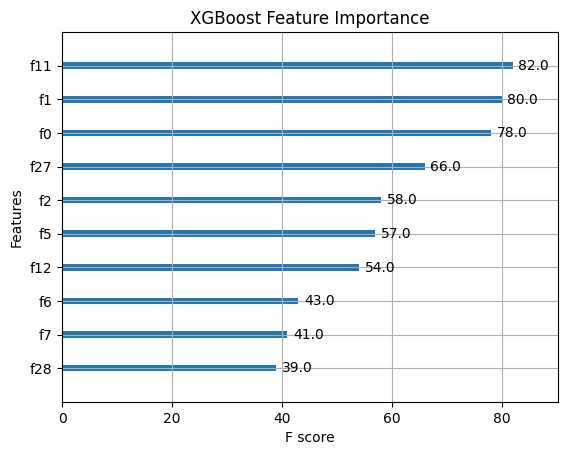

In [285]:
import matplotlib.pyplot as plt

# 特徴量の重要度をプロット
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='weight')
plt.title('XGBoost Feature Importance')
plt.show()


In [286]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# モデルの定義と訓練
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)

# テストデータの予測
y_pred = log_model.predict(X_test)
y_pred_proba = log_model.predict_proba(X_test)[:, 1]  # 1の確率

# 評価指標の出力
print("混同行列:\n", confusion_matrix(y_test, y_pred))
print("\n分類レポート:\n", classification_report(y_test, y_pred))
print("\nROC AUCスコア:", roc_auc_score(y_test, y_pred_proba))

# モデルの係数（特徴量の影響）を表示
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': log_model.coef_[0]}).sort_values(by='Coefficient', ascending=False)
print("\n特徴量の係数:\n", coefficients)


混同行列:
 [[248   8]
 [ 20  18]]

分類レポート:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       256
           1       0.69      0.47      0.56        38

    accuracy                           0.90       294
   macro avg       0.81      0.72      0.75       294
weighted avg       0.90      0.90      0.90       294


ROC AUCスコア: 0.8338815789473684

特徴量の係数:
                               Feature  Coefficient
14                           OverTime     0.880754
25            YearsSinceLastPromotion     0.660304
2                    DistanceFromHome     0.629177
13                 NumCompaniesWorked     0.552632
50               MaritalStatus_Single     0.538137
31   BusinessTravel_Travel_Frequently     0.525933
48       JobRole_Sales Representative     0.475353
47            JobRole_Sales Executive     0.447935
15                  PercentSalaryHike     0.376501
42      JobRole_Laboratory Technician     0.320232
40                        Gend

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20418 (\N{CJK UNIFIED IDEOGRAPH-4FC2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

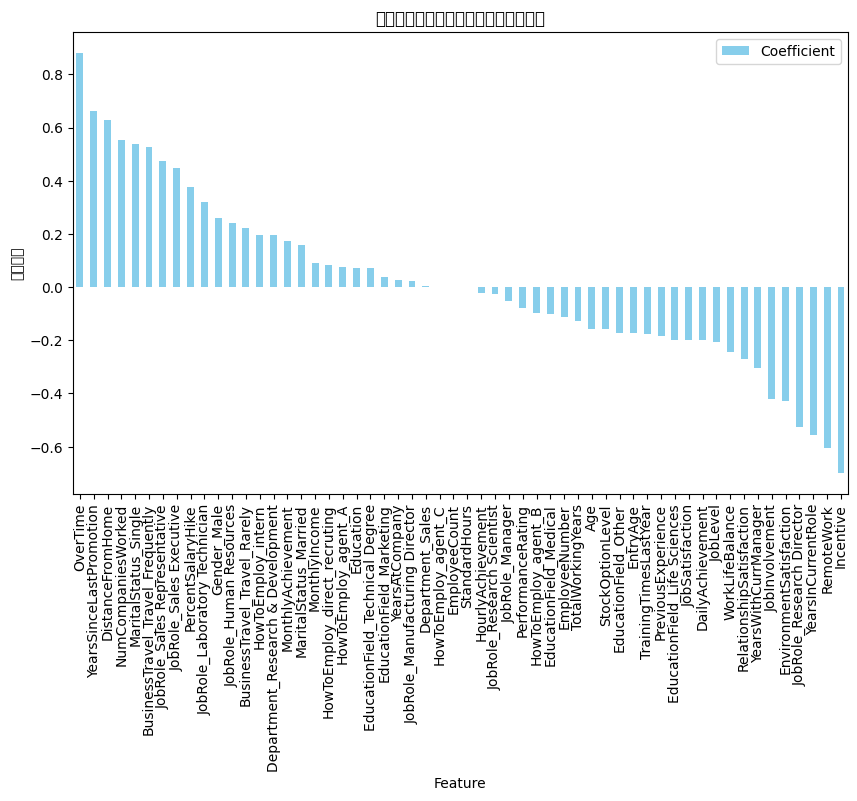

In [287]:
# 係数の可視化
coefficients.plot(kind='bar', x='Feature', y='Coefficient', figsize=(10, 6), color='skyblue')
plt.title('特徴量の係数（ロジスティック回帰）')
plt.ylabel('係数の値')
plt.show()


In [290]:
# prompt: mitplotlib　の日本語を追加
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c1b84e5325166e696682d7268fc212e7b36e5de95196f688bea2954e07d3e044
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


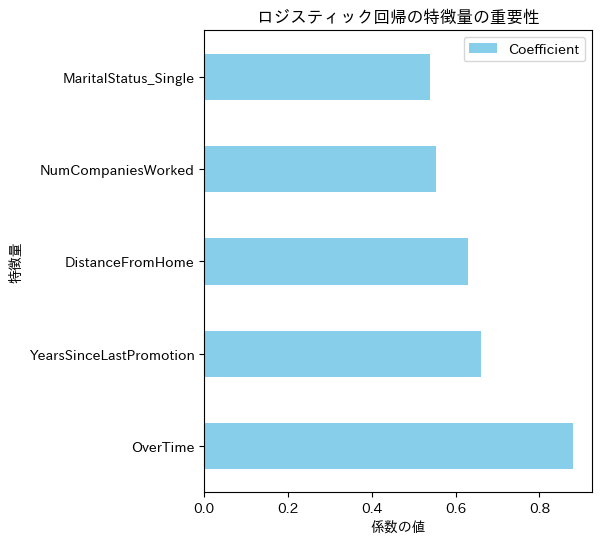

In [293]:
# 棒グラフで可視化
coefficients.head(5).sort_values(by='Coefficient', ascending=False).plot(
    kind='barh', x='Feature', y='Coefficient', figsize=(5, 6), color='skyblue')
plt.title('ロジスティック回帰の特徴量の重要性')
plt.xlabel('係数の値')
plt.ylabel('特徴量')
plt.show()


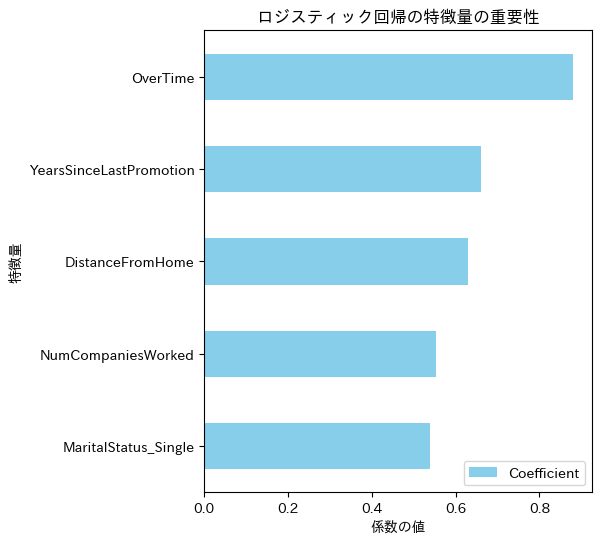

In [294]:
coefficients.head(5).sort_values(by='Coefficient', ascending=False).plot(
    kind='barh', x='Feature', y='Coefficient', figsize=(5, 6), color='skyblue')
plt.title('ロジスティック回帰の特徴量の重要性')
plt.xlabel('係数の値')
plt.ylabel('特徴量')
plt.show()

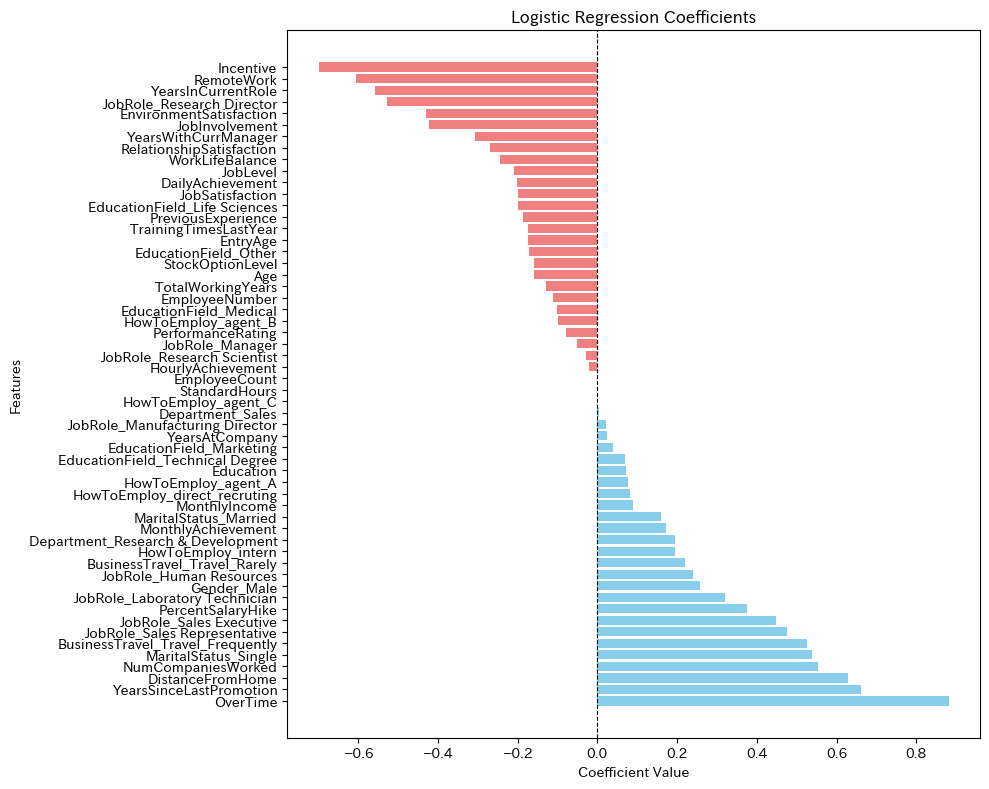

In [295]:
# 特徴量を正負で色分け
coefficients['Color'] = np.where(coefficients['Coefficient'] > 0, 'skyblue', 'lightcoral')

# 特徴量を係数の絶対値でソート
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=False)

# グラフを作成
plt.figure(figsize=(10, 8))
plt.barh(coefficients_sorted['Feature'], coefficients_sorted['Coefficient'], color=coefficients_sorted['Color'])
plt.xlabel('Coefficient Value')
plt.ylabel('')
plt.title('Logistic Regression Coefficients')
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')  # 係数0の基準線
plt.tight_layout()
plt.show()

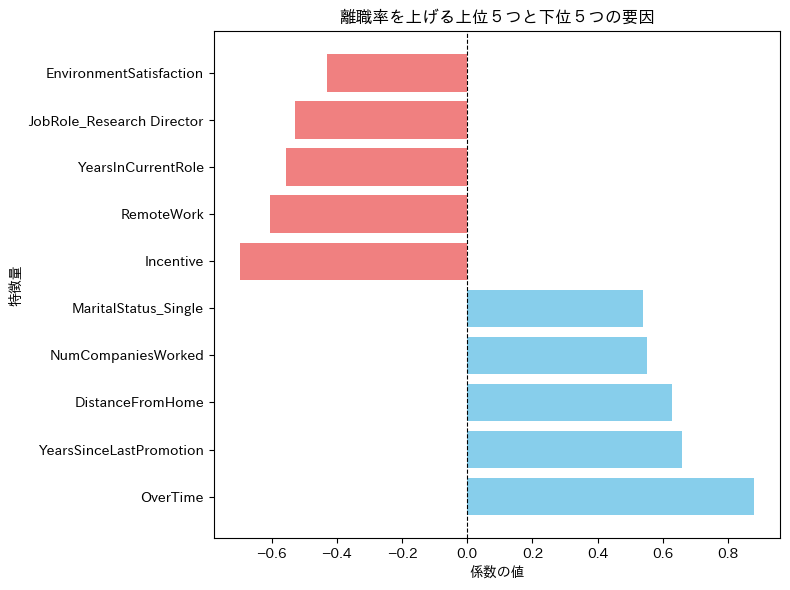

In [297]:
# 上位5つと下位5つを抽出
top_5 = coefficients.nlargest(5, 'Coefficient')
bottom_5 = coefficients.nsmallest(5, 'Coefficient')

# データを結合
top_bottom = pd.concat([top_5, bottom_5])

# 特徴量を正負で色分け
top_bottom['Color'] = np.where(top_bottom['Coefficient'] > 0, 'skyblue', 'lightcoral')

# グラフを作成
plt.figure(figsize=(8, 6))
plt.barh(top_bottom['Feature'], top_bottom['Coefficient'], color=top_bottom['Color'])
plt.xlabel('係数の値')
plt.ylabel('特徴量')
plt.title('離職率を上げる上位５つと下位５つの要因')
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')  # 係数0の基準線
plt.tight_layout()
plt.show()